Based on a talk by Dr. Adrin Jalali https://github.com/adrinjalali/talks/tree/master/2018/CNNs-long

# Neural Networks, Tensorflow, Deep Learning

#### Requirements: 

 - python3
 - ipython
 - notebook (jupyter)
 - matplotlib
 - numpy, pandas
 - keras
 - tensorflow


## Neural Networks

### A single neuron

![spiking neural network](http://lis2.epfl.ch/CompletedResearchProjects/EvolutionOfAdaptiveSpikingCircuits/images/neuron.jpg)

### Spiking Neural Networks

![spiking system](http://lis2.epfl.ch/CompletedResearchProjects/EvolutionOfAdaptiveSpikingCircuits/images/spiking.jpg)


### Artificial Neuron (Perceptron - 1957)
[Source](http://natureofcode.com/book/chapter-10-neural-networks/)

![](http://natureofcode.com/book/imgs/chapter10/ch10_05.png)

$$output = f(x \times w_x + y \times w_y)$$
$$f(x) = sign(x)$$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4f/Signum_function.svg/200px-Signum_function.svg.png)

### Classification

![](http://natureofcode.com/book/imgs/chapter10/ch10_04.png)

#### Add bias
![](http://natureofcode.com/book/imgs/chapter10/ch10_06.png)

$$output = f(x \times w_x + y \times w_y + bias \times w_{bias})$$
$$f(x) = sign(x)$$


#### Feed the data
![](http://natureofcode.com/book/imgs/chapter10/ch10_07.png)

### Excercise: derive the weight update formula.


$$output = sign(x \times w_x + y \times w_y + b \times w_b)$$

$$error = desired - output$$

$$w_{new} = w + \Delta w$$

$$\Delta w = error \times input$$

$$\Delta w =  error \times input \times \text{learning rate}$$

## Classification

### Logical OR

#### Initialize variables

In [10]:
print(math.copysign(1, -0.1))
print(math.copysign(1, 1.1))

-1.0
1.0


In [33]:
import numpy as np
import math

sign = lambda x: math.copysign(1, x)

def f(X, W):
     """
    Compute the sign of the linear combination of input features and weights.

    Args:
        X (list or array-like): Input features as a list or array.
        W (list or array-like): Coefficients or weights as a list or array.

    Returns:
        int: The sign of the linear combination, where 1 indicates a positive result,
             0 indicates zero, and -1 indicates a negative result.

    This function calculates the sign of the linear combination of input features and
    weights. It takes the dot product of the input features (X) and coefficients (W),
    and returns the sign of the result, where 1 represents a positive result, 0
    represents zero, and -1 represents a negative result.
    """
    return sign(sum([x * w for x, w in zip(X, W)]))

data = np.array(
    [[0, 0,],
     [1, 0,],
     [0, 1,],
     [1, 1,]
    ]) # The input data

output = np.array([-1, 1, 1, 1]) # The expected output

W = np.random.normal(0, size=2)

#### Error

In [34]:
for i in range(len(data)):
    print('desired: %2d, expected: %2d, error: %2d' % 
          (f(data[i], W), 
           output[i],
           output[i] - f(data[i], W)))

desired:  1, expected: -1, error: -2
desired: -1, expected:  1, error:  2
desired: -1, expected:  1, error:  2
desired: -1, expected:  1, error:  2


In [35]:
def total_error(X, W, y):
    """
    Calculate the total error of a linear model.

    Args:
        X (array-like): Input features or data matrix.
        W (array-like): Coefficients or weights of the linear model.
        y (array-like): Target values or labels.

    Returns:
        float: The total error, computed as the sum of absolute differences
               between predicted values and actual target values.

    This function calculates the total error of a linear model by summing
    the absolute differences between the predicted values and the actual target values.
    The input features are represented as X, the model coefficients as W, and the
    corresponding target values as y.
    """
    return sum([abs(y[i] - f(X[i,], W)) for i in range(len(X))])

#### Update Weights

In [36]:
def new_w(X, W, y, learning_rate):
    """
    Update the model's weights using a learning rate and error correction.

    Args:
        X (list or array-like): Input features as a list or array.
        W (list or array-like): Coefficients or weights as a list or array.
        y (float or int): Target value or label.
        learning_rate (float): The learning rate used for weight updates.

    Returns:
        np.ndarray: An updated array of weights after applying the correction.

    This function updates the model's weights by computing the prediction using the
    current weights and input features, calculating the error between the prediction
    and the actual target value (y), and adjusting the weights based on the error and
    the specified learning rate.
    """
    output = f(X, W)
    error = y - output
    delta_w = np.array([error * x * learning_rate for x in X])
    return W + delta_w

#### Train

In [44]:
learning_rate = 0.005
W = np.random.normal(0, size=2)
print('starting error: %2g' % total_error(data, W, output))

print(W)

for epoch in range(100):
    for i in range(len(data)):
        W = new_w(data[i,:], W, output[i], learning_rate)
        
    print('error: %2g, W: %s' % (total_error(data, W, output), str(W)))
    if total_error(data, W, output) == 0:
        break

starting error:  4
[-0.52770426  1.34957208]
error:  4, W: [-0.51770426  1.34957208]
error:  4, W: [-0.50770426  1.34957208]
error:  4, W: [-0.49770426  1.34957208]
error:  4, W: [-0.48770426  1.34957208]
error:  4, W: [-0.47770426  1.34957208]
error:  4, W: [-0.46770426  1.34957208]
error:  4, W: [-0.45770426  1.34957208]
error:  4, W: [-0.44770426  1.34957208]
error:  4, W: [-0.43770426  1.34957208]
error:  4, W: [-0.42770426  1.34957208]
error:  4, W: [-0.41770426  1.34957208]
error:  4, W: [-0.40770426  1.34957208]
error:  4, W: [-0.39770426  1.34957208]
error:  4, W: [-0.38770426  1.34957208]
error:  4, W: [-0.37770426  1.34957208]
error:  4, W: [-0.36770426  1.34957208]
error:  4, W: [-0.35770426  1.34957208]
error:  4, W: [-0.34770426  1.34957208]
error:  4, W: [-0.33770426  1.34957208]
error:  4, W: [-0.32770426  1.34957208]
error:  4, W: [-0.31770426  1.34957208]
error:  4, W: [-0.30770426  1.34957208]
error:  4, W: [-0.29770426  1.34957208]
error:  4, W: [-0.28770426  1.34957

### Logical AND

#### Initialize variables

In [31]:
data = np.array([[0, 0, 1],
                 [1, 0, 1],
                 [0, 1, 1],
                 [1, 1, 1],
                ])
output = np.array([-1, -1, -1, 1])

W = np.random.normal(0, size=3)

#### Train

In [32]:
learning_rate = 0.1
print('starting error: %2g' % total_error(data, W, output))

for epoch in range(100):
    for i in range(len(data)):
        W = new_w(data[i,:], W, output[i], learning_rate)
        
    print('error: %2g, W: %s i:%i' % (total_error(data, W, output), str(W), i))
    if total_error(data, W, output) == 0:
        break

starting error:  6
error:  4, W: [-0.25659762  0.32059682  0.14466139] i:3
error:  2, W: [-0.05659762  0.32059682 -0.05533861] i:3
error:  4, W: [ 0.14340238  0.32059682 -0.05533861] i:3
error:  2, W: [ 0.14340238  0.32059682 -0.25533861] i:3
error:  4, W: [ 0.34340238  0.32059682 -0.25533861] i:3
error:  0, W: [ 0.14340238  0.32059682 -0.45533861] i:3


### Demo
http://natureofcode.com/book/chapter-10-neural-networks/

https://bit.ly/1QwqTmA

### Logical XOR

#### Initialize variables

In [82]:
data = np.array([[0, 0, 1],
                 [1, 0, 1],
                 [0, 1, 1],
                 [1, 1, 1]])
output = np.array([-1, 1, 1, -1])

W = np.random.normal(0, size=3)

#### Train

In [84]:
learning_rate = 0.1
W = np.random.normal(0, size=3)
print('starting error: %2g' % total_error(data, W, output))

for epoch in range(100):
    for i in range(len(data)):
        W = new_w(data[i,:], W, output[i], learning_rate)
        
    print('error: %2g, W: %s' % (total_error(data, W, output), str(W)))
    if total_error(data, W, output) == 0:
        break

starting error:  4
error:  4, W: [ 0.20181223  0.70256253 -1.10922323]
error:  4, W: [ 0.20181223  0.70256253 -0.90922323]
error:  6, W: [ 0.20181223  0.70256253 -0.70922323]
error:  4, W: [ 0.20181223  0.50256253 -0.70922323]
error:  6, W: [ 0.20181223  0.50256253 -0.50922323]
error:  4, W: [ 0.20181223  0.30256253 -0.50922323]
error:  6, W: [ 0.20181223  0.30256253 -0.30922323]
error:  4, W: [ 0.20181223  0.10256253 -0.30922323]
error:  4, W: [ 0.20181223  0.10256253 -0.10922323]
error:  4, W: [ 0.00181223  0.10256253 -0.10922323]
error:  4, W: [ 0.00181223 -0.09743747 -0.10922323]
error:  4, W: [ 0.00181223 -0.09743747  0.09077677]
error:  4, W: [ 0.00181223 -0.09743747  0.09077677]
error:  4, W: [ 0.00181223 -0.09743747  0.09077677]
error:  4, W: [ 0.00181223 -0.09743747  0.09077677]
error:  4, W: [ 0.00181223 -0.09743747  0.09077677]
error:  4, W: [ 0.00181223 -0.09743747  0.09077677]
error:  4, W: [ 0.00181223 -0.09743747  0.09077677]
error:  4, W: [ 0.00181223 -0.09743747  0.090

#### Train (observe more closely)

In [83]:
learning_rate = 0.1
W = np.random.normal(0, size=3)
print('starting error: %2g' % total_error(data, W, output))

for epoch in range(100):
    for i in range(len(data)):
        W = new_w(data[i,:], W, output[i], learning_rate)
        
        print('error: %2g, W: %s i: %i' % (total_error(data, W, output), str(W), i))
    #print('error: %2g, W: %s i: %i' % (total_error(data, W, output), str(W), i))

    if total_error(data, W, output) == 0:
        break

starting error:  4
error:  4, W: [-0.79456032 -0.34411754 -0.0798738 ] i: 0
error:  6, W: [-0.59456032 -0.34411754  0.1201262 ] i: 1
error:  4, W: [-0.59456032 -0.14411754  0.3201262 ] i: 2
error:  4, W: [-0.59456032 -0.14411754  0.3201262 ] i: 3
error:  6, W: [-0.59456032 -0.14411754  0.1201262 ] i: 0
error:  4, W: [-0.39456032 -0.14411754  0.3201262 ] i: 1
error:  4, W: [-0.39456032 -0.14411754  0.3201262 ] i: 2
error:  4, W: [-0.39456032 -0.14411754  0.3201262 ] i: 3
error:  6, W: [-0.39456032 -0.14411754  0.1201262 ] i: 0
error:  2, W: [-0.19456032 -0.14411754  0.3201262 ] i: 1
error:  2, W: [-0.19456032 -0.14411754  0.3201262 ] i: 2
error:  2, W: [-0.19456032 -0.14411754  0.3201262 ] i: 3
error:  6, W: [-0.19456032 -0.14411754  0.1201262 ] i: 0
error:  4, W: [ 0.00543968 -0.14411754  0.3201262 ] i: 1
error:  4, W: [ 0.00543968 -0.14411754  0.3201262 ] i: 2
error:  6, W: [-0.19456032 -0.34411754  0.1201262 ] i: 3
error:  4, W: [-0.19456032 -0.34411754 -0.0798738 ] i: 0
error:  4, W

### Linear Separability

![](http://natureofcode.com/book/imgs/chapter10/ch10_12.png)
![](http://natureofcode.com/book/imgs/chapter10/ch10_13.png)


#### Multilayer perceptron
![](http://natureofcode.com/book/imgs/chapter10/ch10_14.png)

## Regression

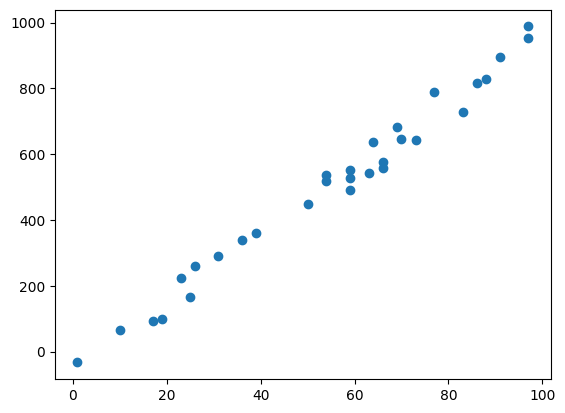

In [40]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randint(100, size=30)
y = 10 * x - 40 + np.random.normal(size=30) * 40

x = x.reshape(-1, 1)
data = np.hstack((x, np.ones_like(x)))

plt.scatter(x, y)

In [41]:
def f(X, W):
    return sum([x * w for x, w in zip(X, W)])

def new_w(X, W, y, learning_rate):
    output = f(X, W)
    error = y - output
    delta_w = np.array([error * x * learning_rate for x in X])
    return W + delta_w

def total_error(X, W, y):
    return sum([abs(y[i] - f(X[i,], W)) for i in range(len(X))])

In [42]:
learning_rate = 0.00001
W = np.random.normal(size=2)

for epoch in range(20000):
    if epoch % 2000 == 0:
        print('error: %2g, W: %s' % (total_error(data, W, y), str(W)))
        
    for i in range(len(data)):
        W = new_w(data[i,], W, y[i], learning_rate)

error: 15633.1, W: [-0.17946429 -1.6433203 ]
error: 1029.77, W: [ 9.41619007 -6.81869316]
error: 1015.09, W: [  9.48573534 -11.56414746]
error: 1003.08, W: [  9.54783334 -15.80143409]
error: 992.346, W: [  9.60328157 -19.58497026]
error: 982.764, W: [  9.65279212 -22.96334591]
error: 974.209, W: [  9.69700082 -25.9799477 ]
error: 966.569, W: [  9.73647543 -28.67351625]
error: 959.748, W: [  9.77172289 -31.07864361]
error: 953.657, W: [  9.80319587 -33.22621756]


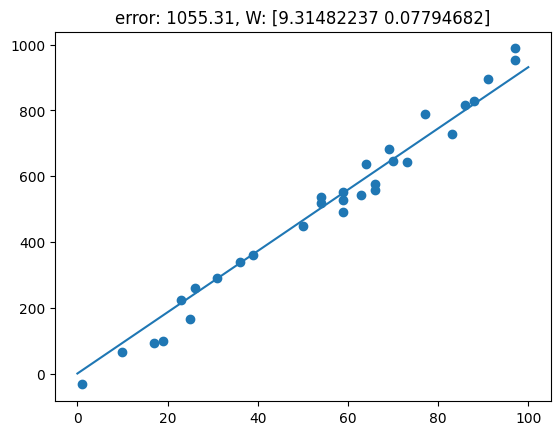

In [43]:
from IPython.display import clear_output
import time

def plot(data, y, W):
    plt.scatter(data[:,0], y)
    plt.plot([0, 100], [f([0, 1], W), f([100, 1], W)])
    plt.title('error: %2g, W: %s' % (total_error(data, W, y), str(W)))
    plt.show()
    
learning_rate = 0.00001
W = np.random.normal(size=2)

for epoch in range(10):
    clear_output()
    plot(data, y, W)
    time.sleep(1)
        
    for i in range(len(data)):
        W = new_w(data[i,], W, y[i], learning_rate)

#### Dynamic Learning Rate

In [44]:
learning_rate = 0.0001
W = np.random.normal(size=2)

for epoch in range(20000):
    if epoch % 2000 == 0:
        print('error: %2g, W: %s, lr: %4g' % (total_error(data, W, y), str(W), learning_rate))
        learning_rate = learning_rate * 0.9
        
    for i in range(len(data)):
        W = new_w(data[i,], W, y[i], learning_rate)
        
    if total_error(data, W, y) == 0:
        break

error: 15333.9, W: [-0.0158784  -0.59993242], lr: 0.0001
error: 1180.42, W: [  9.43345062 -36.43344965], lr: 9e-05
error: 1176.08, W: [  9.61612375 -47.9204734 ], lr: 8.1e-05
error: 1161.11, W: [  9.70363958 -51.85075112], lr: 7.29e-05
error: 1139.87, W: [  9.75655197 -53.21109522], lr: 6.561e-05
error: 1117.57, W: [  9.79498678 -53.62712104], lr: 5.9049e-05
error: 1095.89, W: [  9.82635133 -53.67646863], lr: 5.31441e-05
error: 1077.29, W: [  9.85366238 -53.57993033], lr: 4.78297e-05
error: 1061.19, W: [  9.8782758  -53.42702474], lr: 4.30467e-05
error: 1046.11, W: [  9.90085519 -53.25569716], lr: 3.8742e-05


## Iterative Approach
![](./figs/iterative.png)

![](figs/loss1.png)

![](figs/loss2.png)

![](figs/loss3.png)

![](figs/loss4.png)

![](figs/lr1.png)

![](figs/lr2.png)

![](figs/lr3.png)

### Activation Functions: [wiki](https://en.wikipedia.org/wiki/Activation_function)
https://en.wikipedia.org/wiki/Activation_function

![](./figs/activation-funcs.png)


## Convolutional Neural Networks (CNN)

![](https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png)

### Weight Sharing, Convolution

### Max Pooling
![](https://upload.wikimedia.org/wikipedia/commons/e/e9/Max_pooling.png)

### Dropout, {L1, L2} regularization, artificial data, etc.

### Keras
#### keras.io

![](figs/keras.png)

# MNIST

![](http://andrea.burattin.net/public-files/stuff/handwritten-digit-recognition/example_mnist.gif)


# MNIST

![](figs/mnist-perfs.png)

### Based on keras examples, specifically [this one](https://keras.io/examples/vision/mnist_convnet/)

In [45]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


2023-10-10 22:30:31.651116: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [46]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Check the image data format and reshape the data accordingly
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Preprocess the image data:
# - Convert pixel values to float32
# - Normalize pixel values to a range between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class labels to binary class matrices (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [64]:
model = Sequential()
# Add a Convolutional layer with 8 filters, each using a 3x3 kernel and ReLU activation.
# Set the input shape to match the dimensions of the input data.
model.add(Conv2D(
    32,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=input_shape
))
model.add(Conv2D(
    64,
    (3, 3),
    activation='relu'
))
# Add a MaxPooling layer to downsample the spatial dimensions by a factor of 2.
# MaxPooling reduces the size of the feature maps, retaining the most important information.
# It helps reduce the number of parameters and computational complexity.
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a Dropout layer to prevent overfitting by randomly setting a fraction (here 25%)
# of the input units to 0 during each training update. This temporarily drops out some
# connections, making the model more robust and preventing it from relying too much on
# any one feature. It encourages the network to learn more robust and general patterns.
model.add(Dropout(0.25))
# Flatten the output from the previous layers into a 1D array.
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Add another Dropout layer to prevent overfitting.
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 [==============================] - 48s 101ms/step - loss: 2.2884 - accuracy: 0.1497 - val_loss: 2.2683 - val_accuracy: 0.3382
Epoch 2/12
469/469 [==============================] - 47s 101ms/step - loss: 2.2545 - accuracy: 0.2481 - val_loss: 2.2280 - val_accuracy: 0.4908
Epoch 3/12
469/469 [==============================] - 44s 94ms/step - loss: 2.2129 - accuracy: 0.3424 - val_loss: 2.1756 - val_accuracy: 0.5719
Epoch 4/12
469/469 [==============================] - 44s 93ms/step - loss: 2.1561 - accuracy: 0.4165 - val_loss: 2.1039 - val_accuracy: 0.6330
Epoch 5/12
469/469 [==============================] - 44s 93ms/step - loss: 2.0793 - accuracy: 0.4744 - val_loss: 2.0062 - val_accuracy: 0.6837
Epoch 6/12
469/469 [==============================] - 44s 95ms/step - loss: 1.9761 - accuracy: 0.5221 - val_loss: 1.8744 - val_accuracy: 0.7213
Epoch 7/12
469/469 [==============================] - 44s 94ms/step - loss: 1.8396 - accuracy: 0.5613 - val_loss: 1.7022 - val_accurac

In [65]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_4 (Flatten)         (None, 9216)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               1179776   
                                                      

### Convolution Kernels
![](figs/convolution-kernels.png)
[Source](https://www.jebruner.com/2017/07/interpreting-and-fooling-convolutional-neural-networks-part-1/)

#### Keras
https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py

https://bit.ly/2HzzSKp

In [69]:
from sklearn.metrics import label_ranking_average_precision_score

label_ranking_average_precision_score(y_test, model.predict(x_test))

313/313 [==============================] - 2s 6ms/step


0.901438333333332

### Good old scikit-learn & linear regression

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('variance filter', VarianceThreshold(threshold=0.01)),
    ('standard_scale', StandardScaler()),
    ('estimator', Lasso(alpha=0.1, max_iter=2000)),
])

pipeline.fit(x_train.reshape(60000, -1), y_train)

Pipeline(steps=[('variance filter', VarianceThreshold(threshold=0.01)),
                ('standard_scale', StandardScaler()),
                ('estimator', Lasso(alpha=0.1, max_iter=2000))])

In [55]:
label_ranking_average_precision_score(y_test, pipeline.predict(x_test.reshape(len(x_test), -1)))

0.47801019841269715

### Sci-Kit learn with ensemble method

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

rf_pipeline = Pipeline([
    ('variance filter', VarianceThreshold(threshold=0.01)),
    ('estimator', RandomForestClassifier()),
])

rf_pipeline.fit(x_train.reshape(60000, -1), y_train)

Pipeline(steps=[('variance filter', VarianceThreshold(threshold=0.01)),
                ('estimator', RandomForestClassifier())])

In [67]:
label_ranking_average_precision_score(y_test, rf_pipeline.predict(x_test.reshape(len(x_test), -1)))

0.915310000000009

In [24]:
label_ranking_average_precision_score(y_test, model.predict(x_test))

313/313 [==============================] - 4s 12ms/step


0.903410277777777